<h1 style="text-align: center;">Step and Impulse Response of a RLC Band Pass Filter</h1>
<p style="text-align: center;">Lab 5</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Use Laplace transforms to find the time-domain response of a RLC band pass filter to impulse and step inputs.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Code for the impulse response as a function for **Task 1**.  
[ ] Plot for the impulse response from **Prelab 5**.  
[ ] Plot for the impulse response from **Task 2**
  
##### Part 2
[ ] Code and plot for **Task 1**.  
[ ] Hand calculated final value theorem in a markdown cell from **Task 2**.   

### 3. Part 1
##### 3.1 Purpose
In this part of the lab, you will plot the impulse response of the circuit given in the prelab in two ways:  
1. Using the hand-solved time-domain impulse response from the prelab, implemented as a function.  
2. Using the **scipy.signal.impulse()** function with the s-domain transfer function from the prelab.  
##### 3.2 Tasks   
###### 3.2.1 Example code  
The following code implements the Laplace domain transfer function $H(s) = \frac{s + 2}{s^2 + 3s +8}$.

In [2]:
import scipy.signal as sig
import numpy as np

steps = 1e-5
t = np.arange(0, 1.2e-3 + steps, steps)

num = [1, 2] # creates the numerator s + 2
den = [1, 3, 8] # creates the denominator s**2 + 3s + 8

tout, yout = sig.impulse((num, den), T = t)

*Note: Both plots from this section should be identical.*  
1. Plot the impulse response $h(t)$ that you found by hand in the prelab assignment from $0 \le t \le 1.2$ ms.  

In [81]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

steps = 1e-5
t = np.arange(0, 1.2e-3 + steps, steps)

In [83]:
def step(t):
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            y[i] = 0
        else:
            y[i] = 1
    return y

def sine_method(R, L, C, t):
    alpha = -1/(2*R*C)
    beta = (1/2)*np.sqrt(((1/(R*C))**2)-(4/(L*C))+0*1j)
    p = alpha + beta
    g = (1/(R*C))*(p)
    g_mag = np.abs(g)
    g_angle = np.angle(g)
    omega = np.abs(beta)
    y = (g_mag/omega)*np.exp(alpha*t)*np.sin(omega*t+g_angle)*step(t)
    return y

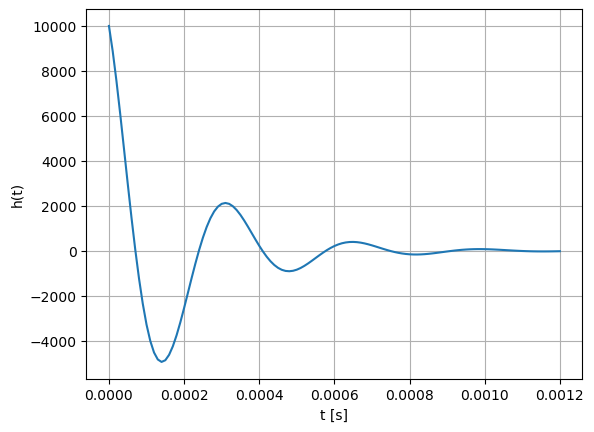

In [85]:
R = 1e3
L = 27e-3
C = 100e-9

y = sine_method(R, L, C, t)

plt.figure()
plt.plot(t, y)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")
plt.show()

2. Use the **scipy.signal.impulse()** function to plot the results from $0 \le t \le 1.2$ ms. 

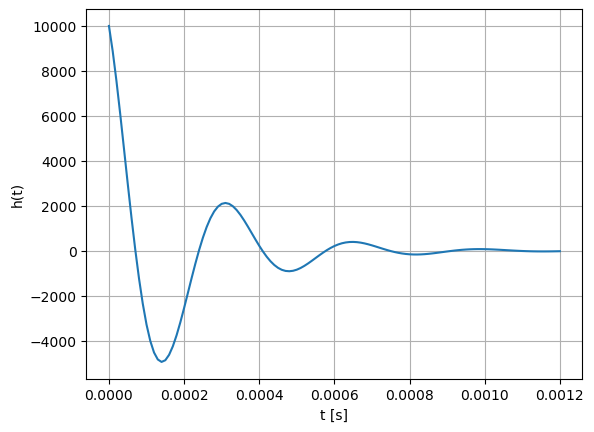

In [88]:
num = [1/(R*C), 0]
den = [1, 1/(R*C), 1/(L*C)]

tout, yout = sig.impulse((num, den), T = t)

plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")
plt.show()

### 4. Part 2
##### 4.1 Purpose
This section uses **scipy.signal.step()** function to plot the step response of the transfer function $H(s)$. Additionally, the final value theorem will be demonstrated.   
##### 3.2 Tasks   
1. Find the step response of $H(s)$ using the **scipy.signal.step()** function from $0 \le t \le 1.2$ ms.

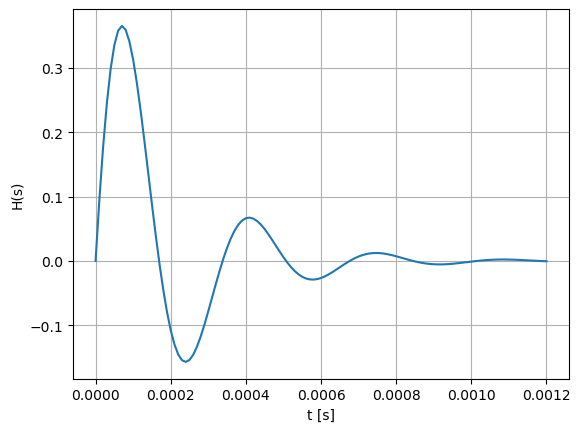

In [97]:
tout, yout = sig.step((num, den), T = t)

plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.show()

2. Perform the final value theorem for the step response $H(s)u(s)$ in the Laplace domain.
>$FVT = \lim_{s\to\ 0 } sH(s)u(s) = \lim_{s\to\ 0 } s*\frac{\frac{1}{RC}s}{s^2+\frac{1}{RC}s+\frac{1}{LC}}*\frac{1}{s} = 0 $

### 5. Questions
1. Explain the result of the Final Value Theorem from **Part 2** **Task 2** in terms of the physical circuit components.  
>$Z_L = sL, Z_C = \frac{1}{sC}+\infty, V_{out} = 0, H(s) = 0$
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>The lab was clear and executable.